In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as Fun

In [ ]:
short_raw_text = '''Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing where words or phrases from the vocabulary are mapped to vectors of real numbers.
Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.
The use of multi-sense embeddings is known to improve performance in several NLP tasks, such as part-of-speech tagging, semantic relation identification, and semantic relatedness.
However, tasks involving named entity recognition and sentiment analysis seem not to benefit from a multiple vector representation.'''.split()
vocab = set(short_raw_text)
vocab_size = len(vocab)

word_to_index = {w: idx for (idx, w) in enumerate(vocab)}
index_to_word = {idx: w for (idx, w) in enumerate(vocab)}

print(word_to_index)
print(index_to_word)

{'vectors': 0, 'sentiment': 1, 'improve': 2, 'of': 3, 'analysis': 4, 'lower': 5, 'Conceptually': 6, 'Word': 7, 'tasks,': 8, 'relation': 9, 'or': 10, 'a': 11, 'not': 12, 'dimension.': 13, 'embeddings': 14, 'as': 15, 'multiple': 16, 'much': 17, 'words': 18, 'techniques': 19, 'set': 20, 'identification,': 21, 'natural': 22, 'representation.': 23, 'in': 24, 'several': 25, 'vocabulary': 26, 'benefit': 27, 'dimensions': 28, 'mathematical': 29, 'multi-sense': 30, 'learning': 31, 'with': 32, 'known': 33, 'such': 34, 'performance': 35, 'the': 36, 'modeling': 37, 'is': 38, 'However,': 39, 'embedding': 40, 'The': 41, 'to': 42, 'numbers.': 43, 'name': 44, 'where': 45, 'mapped': 46, 'space': 47, 'phrases': 48, 'continuous': 49, 'use': 50, 'semantic': 51, 'per': 52, 'vector': 53, 'part-of-speech': 54, 'relatedness.': 55, 'real': 56, 'from': 57, 'word': 58, 'language': 59, 'for': 60, 'collective': 61, 'many': 62, 'seem': 63, 'named': 64, 'entity': 65, 'NLP': 66, 'tasks': 67, 'involving': 68, 'tagging

In [ ]:
data = []
labels = []
n = 0
for i in range(2, len(short_raw_text) - 2):
  n +=1
  context_vec = [word_to_index[short_raw_text[i - 2]], word_to_index[short_raw_text[i - 1]],
                word_to_index[short_raw_text[i + 1]], word_to_index[short_raw_text[i + 2]]]
  context_vec = torch.tensor(context_vec, dtype=torch.long)
  context = Fun.one_hot(context_vec, num_classes = vocab_size)
  context = torch.sum(context, dim = 0, keepdim = True)
  target = torch.tensor(word_to_index[short_raw_text[i]])
  labels.append(target)
  target = Fun.one_hot(target, num_classes = vocab_size)
  data.append((context, target))
print(n)

96


In [ ]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
      super(CBOW, self).__init__()
      self.L1 = nn.Linear(vocab_size, embedding_dim, bias = False)
      self.L3 = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
      out = Fun.relu(self.L1(x))
      out = Fun.softmax(self.L3(out), dim = 1)
      return out

In [ ]:
model = CBOW(vocab_size, 32)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
loss_func = []
accuracy = []

for i in range(0,200):
  loss = 0
  acc = 0
  for k, (context, target) in enumerate(data):
    output = model(context.float())
    loss += criterion(output.squeeze(0), target.float())
    _, predicted = torch.max(output.data , 1)
    if(predicted == labels[k]):
      acc += 1
  loss_func.append(float(loss))
  accuracy.append(acc/n*100)
  if(i%10 == 0):
    print(loss)
    print(acc/n*100)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor(416.9932, grad_fn=<AddBackward0>)
3.125
tensor(415.7150, grad_fn=<AddBackward0>)
18.75
tensor(407.6710, grad_fn=<AddBackward0>)
21.875
tensor(386.8526, grad_fn=<AddBackward0>)
54.166666666666664
tensor(359.3456, grad_fn=<AddBackward0>)
71.875
tensor(341.5875, grad_fn=<AddBackward0>)
84.375
tensor(335.9910, grad_fn=<AddBackward0>)
87.5
tensor(332.9203, grad_fn=<AddBackward0>)
90.625
tensor(331.8801, grad_fn=<AddBackward0>)
91.66666666666666
tensor(330.9902, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.3348, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.2081, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1861, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1726, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1627, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1551, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1489, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1435, grad_fn=<AddBackward0>)
92.70833333333334
tensor(330.1388, g

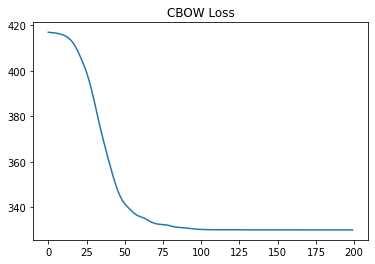

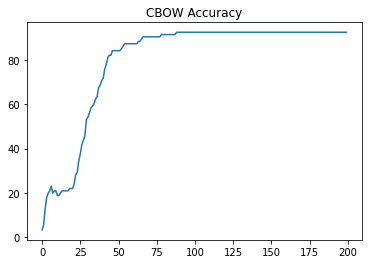

In [ ]:
plt.plot(loss_func)
plt.title("CBOW Loss")
plt.show()
plt.plot(accuracy)
plt.title("CBOW Accuracy")
plt.show()

In [ ]:
txt = input('Enter a text : ')
txt1 = txt.split()
vec = [word_to_index[txt1[0]], word_to_index[txt1[1]], word_to_index[txt1[2]], word_to_index[txt1[3]]]
vec = torch.tensor(vec, dtype = torch.long)
cntxt = Fun.one_hot(vec, num_classes = vocab_size)
cntxt = torch.sum(cntxt, dim = 0, keepdim = True)
output = model(cntxt.float())
_, predicted = torch.max(output.data , 1)
print('Predicted : ', index_to_word[int(predicted)])

Enter a text : natural language where words
Predicted :  processing


In [ ]:
for name, param in model.named_parameters():
  if 'L1.weight' in name:
    embed = param.detach().numpy()
    embed = embed.T
    print('Embedding shape : ', embed.shape)
    print(embed)

Embedding shape :  (77, 32)
[[ 0.78866035 -0.5735306   0.5692431  ...  0.69892025  0.61467195
  -0.6260193 ]
 [-0.44672638 -0.10881215 -0.8156406  ... -0.04483149 -0.7151828
   0.01530136]
 [ 0.74643254 -0.56187665 -0.413877   ...  0.22951983  0.61944824
  -0.6887383 ]
 ...
 [-0.48233926  0.8028196  -0.10908853 ... -0.9722002   0.8596146
   0.8159269 ]
 [-0.06909368  0.53262645 -0.00295839 ... -0.43113998  0.7508904
  -0.6576066 ]
 [ 0.09008552  0.6630671   0.6856238  ... -0.27110308 -0.28080082
  -0.12737355]]


In [ ]:
w1 = input('Enter word-1 : ')
w2 = input('Enter word-2 : ')
w3 = input('Enter word-3 : ')
cos_dist1 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w2]])
cos_dist2 = np.dot(embed[word_to_index[w2]], embed[word_to_index[w3]])
cos_dist3 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w3]])
print('The cosine distance between word-1 and word-2 is : ', cos_dist1)
print('The cosine distance between word-2 and word-3 is : ', cos_dist2)
print('The cosine distance between word-1 and word-3 is : ', cos_dist3)

Enter word-1 : language
Enter word-2 : Word
Enter word-3 : embedding
The cosine distance between word-1 and word-2 is :  2.2879636
The cosine distance between word-2 and word-3 is :  1.0182327
The cosine distance between word-1 and word-3 is :  1.4047143


In [ ]:
def PCA(embedding):
  corr = np.corrcoef(embedding)
  values,vectors = np.linalg.eig(corr)
  args = (-values).argsort()
  values = vectors[args]
  vectors = vectors[:, args]
  new_vectors=vectors[:,:2]
  return np.multiply(embedding[:,:2], new_vectors)

(77, 2)


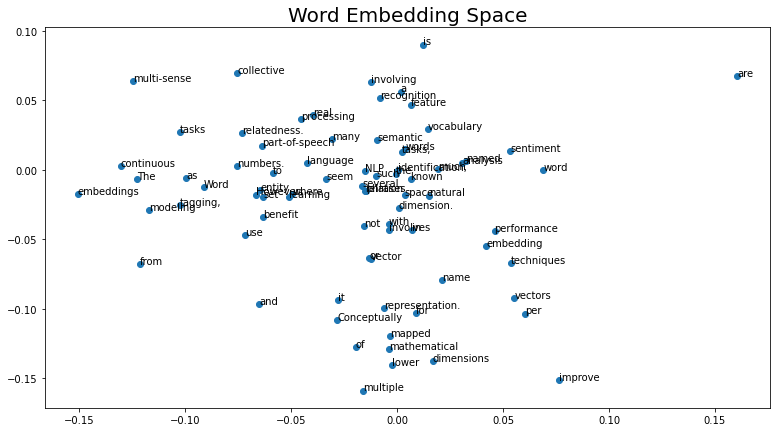

In [ ]:
pca = PCA(embed)
print(pca.shape)
plt.figure(figsize=(13,7))
plt.scatter(pca[:,0], pca[:,1])
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(pca[i,0],pca[i,1]))